In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Problem 1
file='/content/drive/MyDrive/Assignment/WHR-2024-5CS037.csv'
df=pd.read_csv(file)
#First 10 rows
print("The first ten rows:\n",df.head(10))
#Number of rows and colunmns
print("The number of rows and columns:\n",df.shape)
#All columns and their data types
print("All columns and their data types:\n",df.dtypes)

#Mean ,Median and standard deviation
mean=df['score'].mean()
median=df['score'].median()
std=df['score'].std()
print("\nMean:",mean)
print("Median:",median)
print("Standard Deviation:",std)

#Countries with highest and lowest happiness score
max=df['score'].max()
maximum_score=df[df['score']==max]['Country name'].values[0]
min=df['score'].min()
minimum_score=df[df['score']==min]['Country name'].values[0]
print("\nCountries with highest happiness score:\n",maximum_score,":",max)
print("\nCountries with lowest happiness score:\n",minimum_score,":",min)

#Checking missing values
print("\nChecking missing values:\n",df.isnull().sum())


#Countries with greater score>7.5
filtered=df[df['score']>7.5]
sorted_filtered=filtered.sort_values(by='Log GDP per capita',ascending=False).head(10)
print("\nCountries with greater score>7.5:\n",sorted_filtered)

#Adding happiness column
def happiness(score):
  if score<4:
    return "Low"
  elif 4<=score<6:
    return "Medium"
  else:
    return "High"
df['happiness']=df['score'].apply(happiness)
print("\n")
print(df[["Country name",'score','happiness']].head)



The first ten rows:
   Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                  

#Data Visualizations

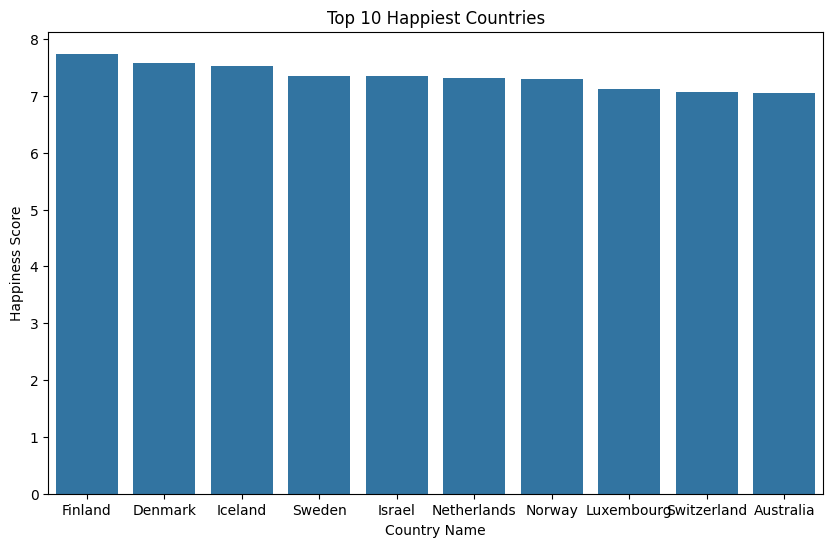

In [ ]:
#Bar Graph
top_10_happiest=df.sort_values(by='score',ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Country name',y='score',data=top_10_happiest)
plt.xlabel('Country Name')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiest Countries')
plt.show()

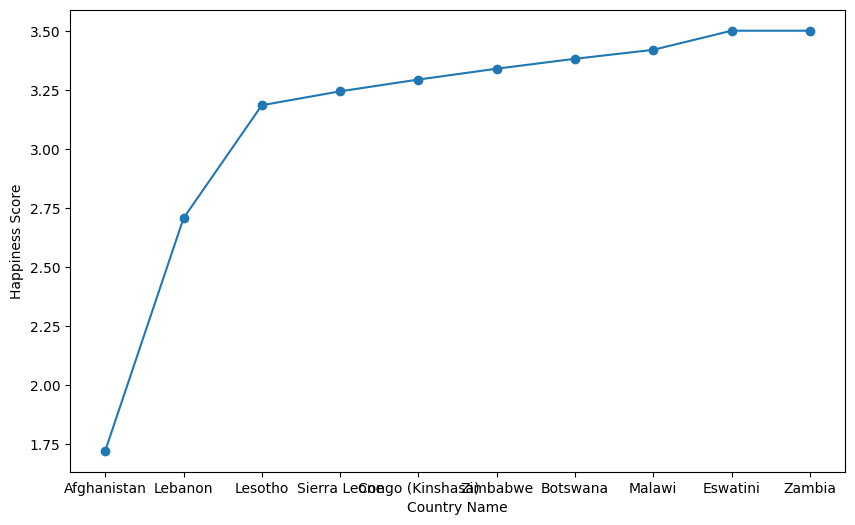

In [ ]:
#Line Plot
top_10_unhappiest=df.sort_values(by='score').head(10)
plt.figure(figsize=(10,6))
plt.plot(top_10_unhappiest['Country name'],top_10_unhappiest['score'],marker='o')
plt.xlabel('Country Name')
plt.ylabel('Happiness Score')
plt.show()

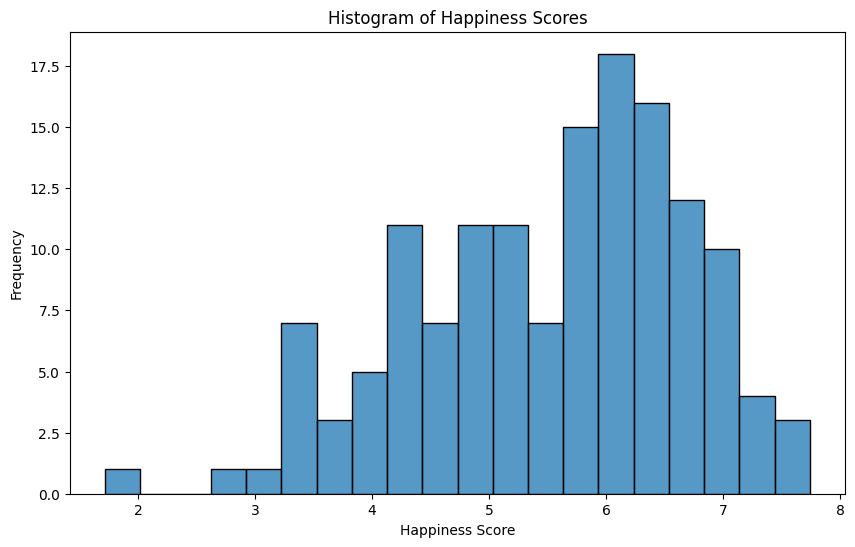

In [ ]:
#plot a histogram
plt.figure(figsize=(10,6))
sns.histplot(df['score'],bins=20)
plt.title('Histogram of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Happiness Score')

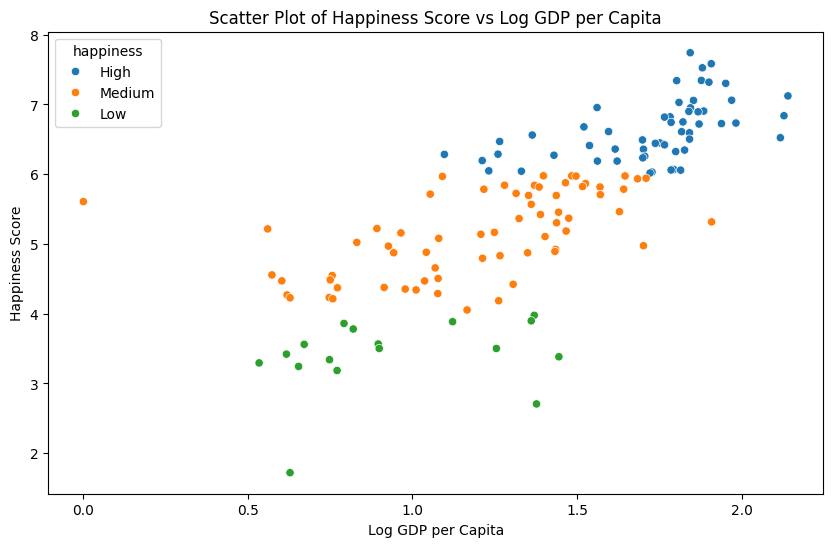

In [ ]:
#Scatter plot between GDP per Capita and Score
plt.figure(figsize=(10,6))
sns.scatterplot(x='Log GDP per capita',y='score',data=df,hue='happiness')
plt.title('Scatter Plot of Happiness Score vs Log GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')

#Problem 2

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

<ipython-input-13-b12fe07a8424>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_df['Composite Score'] =(


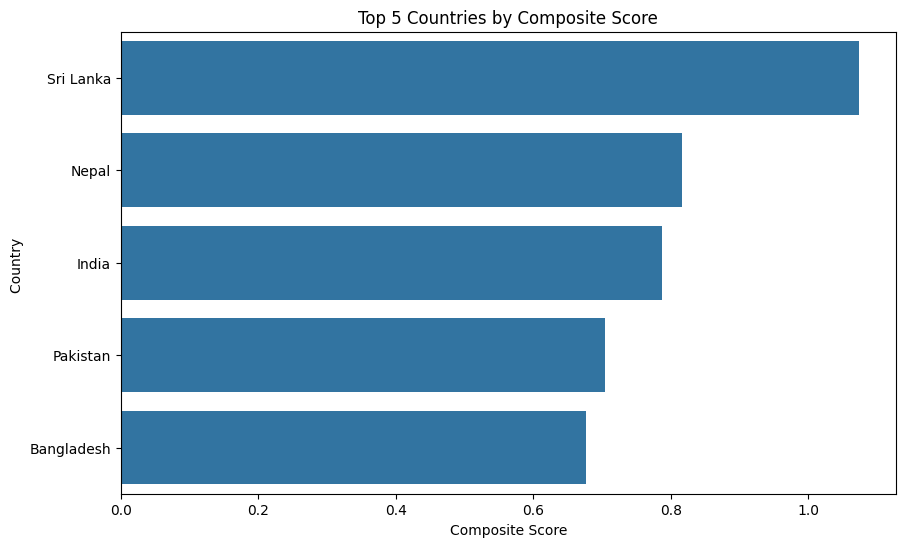

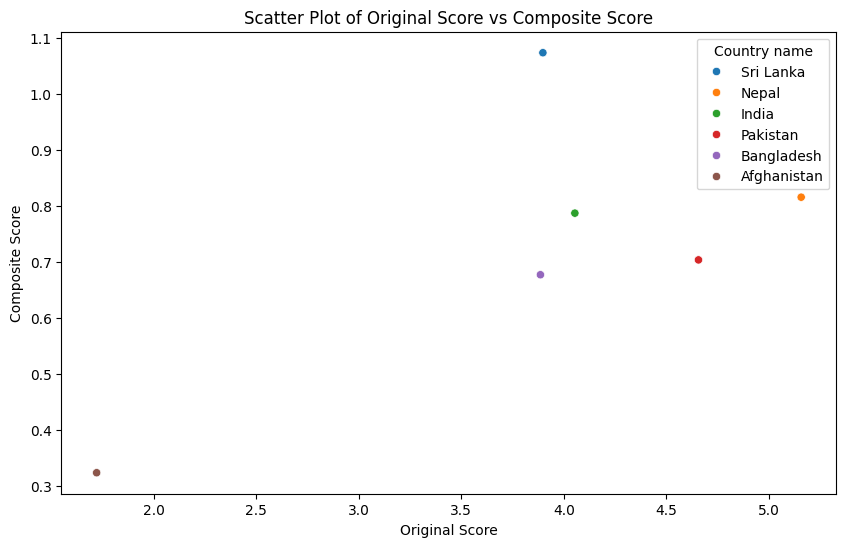

Task3

Outliers based on GDP per capita:
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual happiness  Composite Score  
142                      0.088                0.672       Low           0.3238  

Outliers based on score:
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual happiness  Composite Score  
142                      0.088                0.672       Low           0.3238  


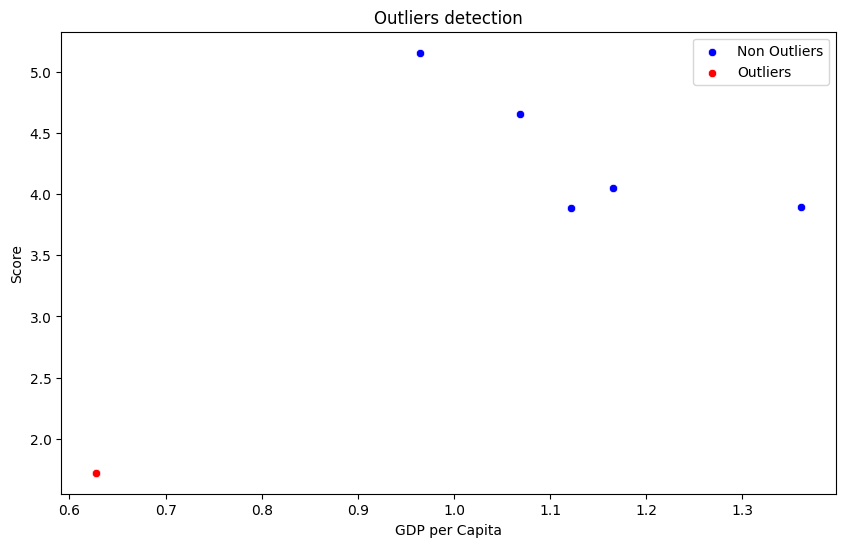

Task4

Correlation between Freedom to make life choices and score: 0.8005185224163315

Correlation between Generosity and score: 0.874512371253192


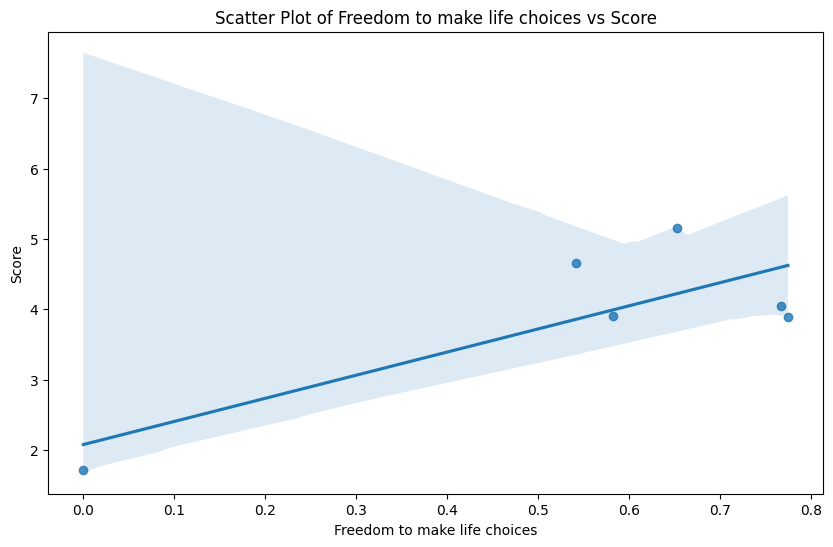

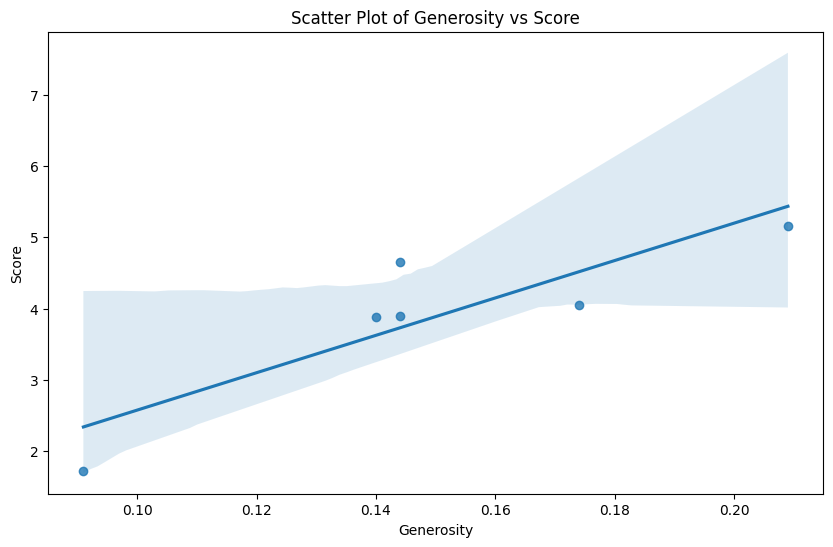

Task5

 Top 3 countries with the highest GDP-Score gap:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

 Top 3 countries with the lowest GDP-Score gap:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


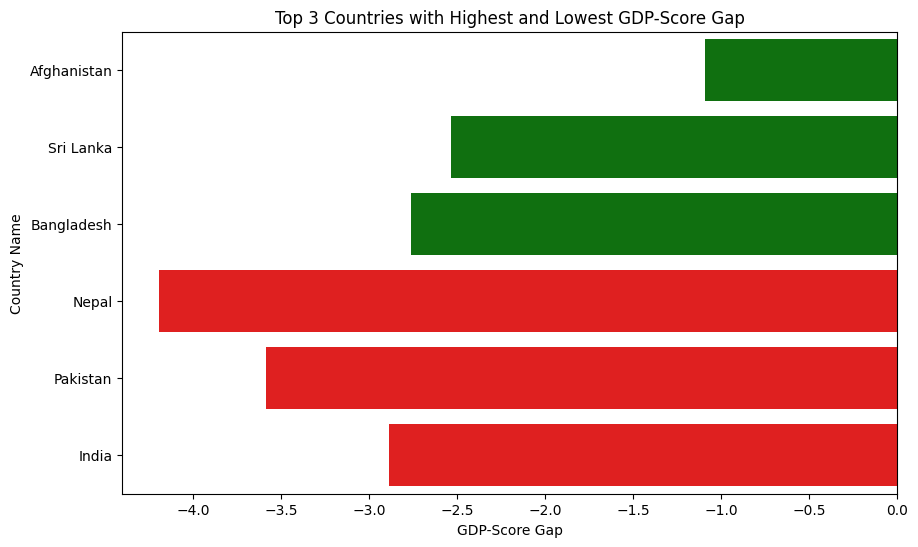

In [13]:
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]
#Task1
#filtered database
south_asian_df = df[df["Country name"].isin(south_asian_countries)]
print(south_asian_df)

#Save the data as a csv file
south_asian_df.to_csv("south_asian_countries.csv", index=False)
print("Dataset saved")

#Task2
#Composite score calculations
print("Task2")
south_asian_df['Composite Score'] =(
    0.40 * south_asian_df['Log GDP per capita'] +
    0.30 * south_asian_df['Social support']+
    0.30 * south_asian_df['Healthy life expectancy'] )

#Ranking countries based on the Composite Score in descending order.
print("\nRanking countries based on the Composite Score in descending order:")
south_asian_df=south_asian_df.sort_values(by='Composite Score',ascending=False)
print(south_asian_df[['Country name','Composite Score']])

#Visualizing the top 5 countries using a horizontal bar chart showing the Composite Score.
high=south_asian_df.head(5)
plt.figure(figsize=(10,6))
sns.barplot(x='Composite Score',y='Country name',data=high)
plt.title('Top 5 Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country ')
plt.show()

#Scatter plot comparing composite and orginal score
plt.figure(figsize=(10,6))
sns.scatterplot(x='score',y='Composite Score',data=south_asian_df,hue='Country name')
plt.title('Scatter Plot of Original Score vs Composite Score')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.show()

#Task3
#Identify outliers based on GDP per capita and score
print("Task3")
def outliers(data,column):
  q1=data[column].quantile(0.25)
  q3=data[column].quantile(0.75)
  Iqr=q3-q1
  lower_bound=q1-1.5*Iqr
  upper_bound=q3+1.5*Iqr
  return data[(data[column]<lower_bound) | (data[column]>upper_bound)]
outliers_gdp=outliers(south_asian_df,'Log GDP per capita')
outliers_score=outliers(south_asian_df,'score')
print("\nOutliers based on GDP per capita:")
print(outliers_gdp)
print("\nOutliers based on score:")
print(outliers_score)

#Scatter plot outlining outliers
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=south_asian_df,
    color='blue',
    label='Non Outliers'
)
sns.scatterplot(
    x=outliers_gdp['Log GDP per capita'],
    y=outliers_gdp['score'],
    data=outliers_gdp,
    color='red',
    label='Outliers'
)
plt.title('Outliers detection')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

#Task 4
print("Task4")
#Correlation  with the score for south asian countries

freedom=south_asian_df["Freedom to make life choices"].corr(south_asian_df["score"])
generous=south_asian_df["Generosity"].corr(south_asian_df["score"])
print("\nCorrelation between Freedom to make life choices and score:",freedom)
print("\nCorrelation between Generosity and score:",generous)

#Scatter plots
#Freedom vs Score
plt.figure(figsize=(10,6))
sns.regplot(x="Freedom to make life choices",y="score",data=south_asian_df)
plt.title('Scatter Plot of Freedom to make life choices vs Score')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
plt.show()

#Generosity vs Score
plt.figure(figsize=(10,6))
sns.regplot(x="Generosity",y="score",data=south_asian_df)
plt.title('Scatter Plot of Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()


#Task 5
print("Task5")
#Gap analysis
#GDP-Score gap
south_asian_df['GDP-Score Gap']=south_asian_df['Log GDP per capita']-south_asian_df['score']

#Ranking countries by the gap in ascending and descending order
ascending_gap=south_asian_df.sort_values(by='GDP-Score Gap',ascending=True)
descending_gap=south_asian_df.sort_values(by='GDP-Score Gap',ascending=False)
print("\n Top 3 countries with the highest GDP-Score gap:")
print(descending_gap.head(3)[['Country name',"GDP-Score Gap"]])
print("\n Top 3 countries with the lowest GDP-Score gap:")
print(ascending_gap.head(3)[['Country name',"GDP-Score Gap"]])

#Bar chart for analyzing the reason behind gaps
top_positive_gap=descending_gap.head(3)
top_negative_gap=ascending_gap.head(3)
plt.figure(figsize=(10,6))
sns.barplot(x='GDP-Score Gap',y='Country name',data=top_positive_gap,color='green')
sns.barplot(x='GDP-Score Gap',y='Country name',data=top_negative_gap,color='red')
plt.title('Top 3 Countries with Highest and Lowest GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country Name')
plt.show()


Problem3

In [16]:
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                        "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
                        "United Arab Emirates", "Yemen"]
middle_east_df=df[df["Country name"].isin(middle_east_countries)]
middle_east_df.to_csv("middle_east_countries.csv",index=False)
print("Database saved")

Database saved


Task1
Mean of south asia: 3.895666666666667
Mean of middle east: 5.412100000000001
Standard Deviation of south asia: 1.1770690152521501
Standard Deviation of middle east: 1.5662011684327144

Middle East has a higher happiness score on average
Task 2

Top Scorers in South Asia:
     Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom Scorers in South Asia:
     Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Top Scorers in Middle East:
             Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom Scorers in Middle East:
     Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


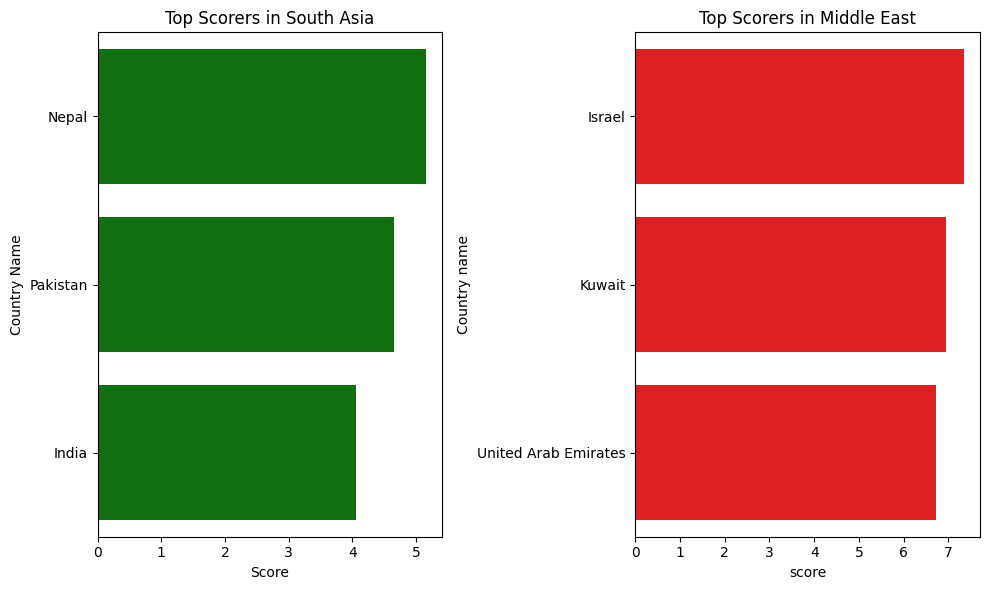

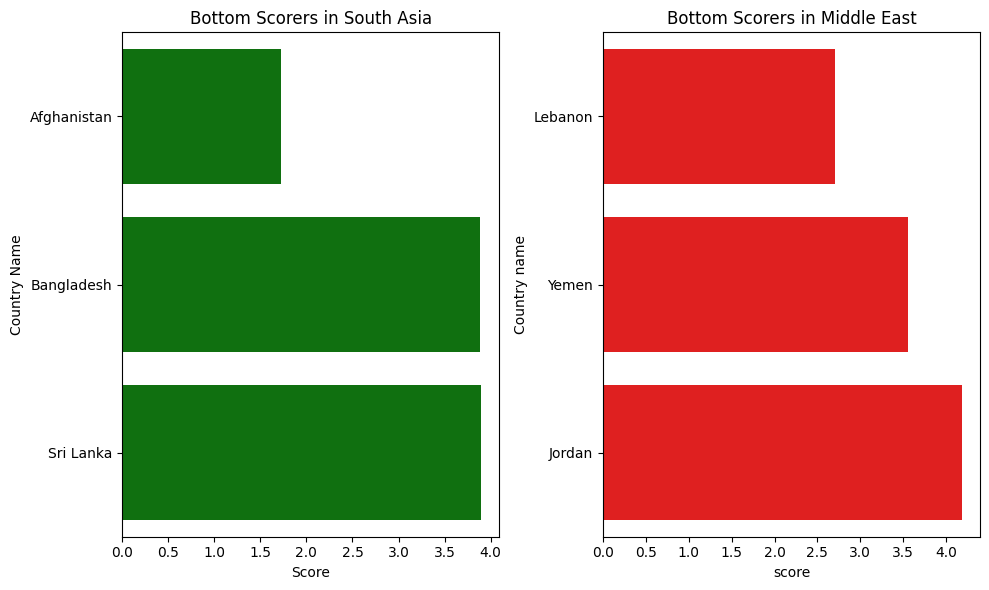

Task3



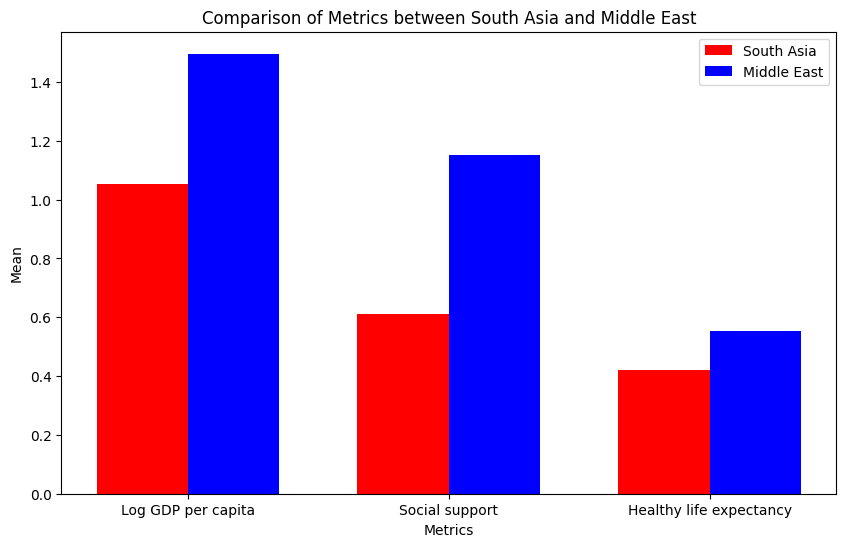

Largest Disparity: Log GDP per capita
Task4

Range of South Asia: 3.4370000000000003
Coefficient of Variation of South Asia: 0.30214828833374263
Range of Middle East: 4.634
Coefficient of Variation of Middle East: 0.28938880812119405

Middle East has a greater variability in happiness

Task5

Correlation between Freedom to make life choices and score in South Asia: 0.8005185224163315
Correlation between Generosity and score in South Asia: 0.874512371253192
Correlation between Freedom to make life choices and score in Middle East: 0.8632202433827543
Correlation between Generosity and score in Middle East: 0.6275236536964182


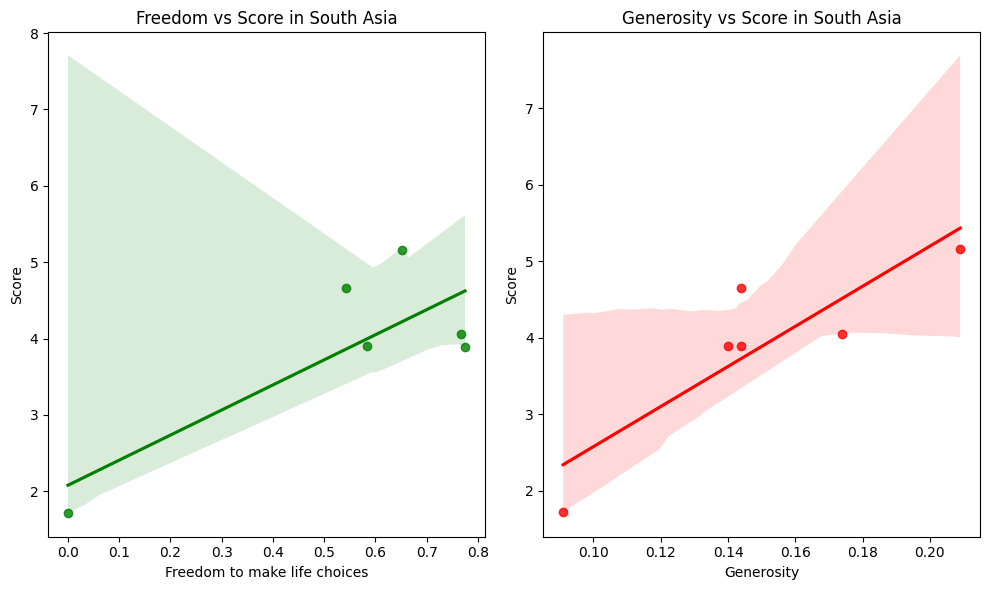


Task 6



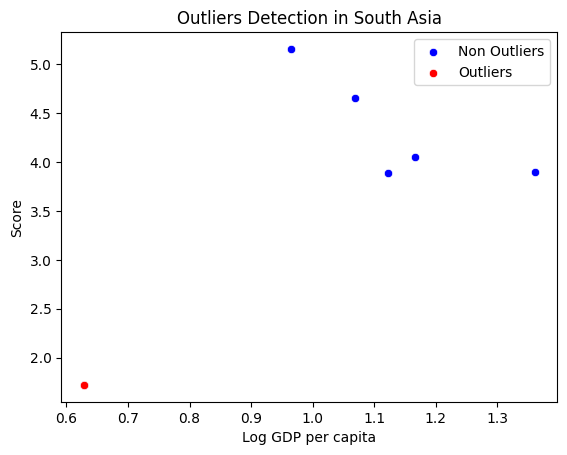


Task 7



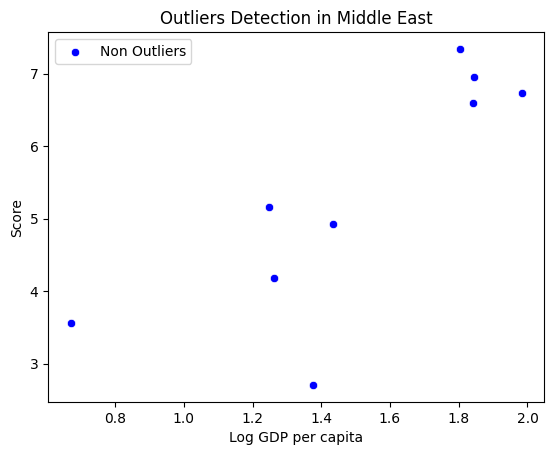

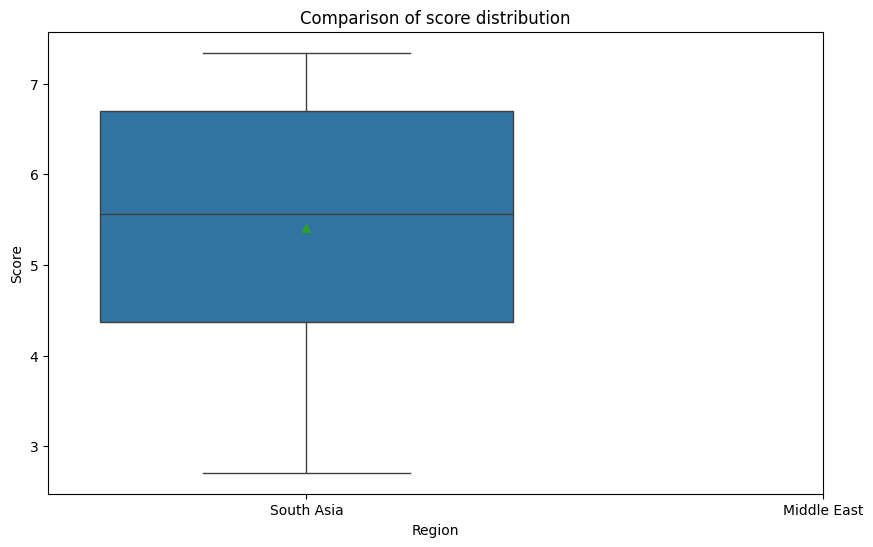

In [41]:
#Task 1
print("Task1")
# Mean Standard deviation of the score for both south asia and middle east
south_asia_mean=south_asian_df['score'].mean()
south_asia_std=south_asian_df['score'].std()

middle_east_mean=middle_east_df['score'].mean()
middle_east_std=middle_east_df['score'].std()

print("Mean of south asia:",south_asia_mean)
print("Mean of middle east:",middle_east_mean)

print("Standard Deviation of south asia:",south_asia_std)
print("Standard Deviation of middle east:",middle_east_std)

#Higher Happiness score
if south_asia_mean>middle_east_mean:
  print("\nSouth Asia has a higher happiness score on average")
else:
  print("\nMiddle East has a higher happiness score on average")

#Task 2
print("Task 2")
#Top and bottom Scorer for South Asia
south_asia_top = south_asian_df.nlargest(3, 'score')[['Country name', 'score']]
south_asia_bottom = south_asian_df.nsmallest(3, 'score')[['Country name', 'score']]
print("\nTop Scorers in South Asia:\n",south_asia_top)
print("\nBottom Scorers in South Asia:\n",south_asia_bottom)

#Top and bottom Scorer for Middle East
middle_east_top = middle_east_df.nlargest(3, 'score')[['Country name', 'score']]
middle_east_bottom = middle_east_df.nsmallest(3, 'score')[['Country name', 'score']]
print("\nTop Scorers in Middle East:\n",middle_east_top)
print("\nBottom Scorers in Middle East:\n",middle_east_bottom)

#Plotting top performers
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x='score',y='Country name',data=south_asia_top,color='green')
plt.title('Top Scorers in South Asia')
plt.xlabel('Score')
plt.ylabel('Country Name')

plt.subplot(1,2,2)
sns.barplot(x='score',y='Country name',data=middle_east_top,color='red')
plt.title('Top Scorers in Middle East')
plt.tight_layout()
plt.show()

#Plotting bottom performers
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x='score',y='Country name',data=south_asia_bottom,color='green')
plt.title('Bottom Scorers in South Asia')
plt.xlabel('Score')
plt.ylabel('Country Name')

plt.subplot(1,2,2)
sns.barplot(x='score',y='Country name',data=middle_east_bottom,color='red')
plt.title('Bottom Scorers in Middle East')
plt.tight_layout()
plt.show()

#Task 3
print("Task3\n")

#Comparing metrics
metrics=['Log GDP per capita','Social support','Healthy life expectancy']

#Computing means
south_asia_means=south_asian_df[metrics].mean()
middle_east_means=middle_east_df[metrics].mean()

#Plotting
x=np.arange(len(metrics))
width=0.35
plt.figure(figsize=(10,6))
plt.bar(x-width/2,south_asia_means,width,label='South Asia',color="red")
plt.bar(x+width/2,middle_east_means,width,label='Middle East',color="blue")
plt.xlabel('Metrics')
plt.ylabel('Mean')
plt.title('Comparison of Metrics between South Asia and Middle East')
plt.xticks(x,metrics)
plt.legend()
plt.show()

#Largest Disparity
disparity=abs(south_asia_mean-middle_east_mean)
largest_disparity_metric=south_asia_means.idxmax()
print("Largest Disparity:",largest_disparity_metric)

#Task 4
print("Task4\n")
#happiness disparity
#Range and cv for south asia
range_south_asia=south_asian_df['score'].max()-south_asian_df['score'].min()
cv_south_asia=south_asia_std/south_asia_mean
print("Range of South Asia:",range_south_asia)
print("Coefficient of Variation of South Asia:",cv_south_asia)

#Range and Cv for middle east
range_middle_east=middle_east_df['score'].max()-middle_east_df['score'].min()
cv_middle_east=middle_east_std/middle_east_mean
print("Range of Middle East:",range_middle_east)
print("Coefficient of Variation of Middle East:",cv_middle_east)

#Reason with greater variabilty
if range_south_asia>range_middle_east:
  print("\nSouth Asia has a greater variability in happiness")
else:
  print("\nMiddle East has a greater variability in happiness")

#Task 5
print("\nTask5\n")

#Corrrelation of score with other metrics

#South Asia
sa_cor_freedom=south_asian_df['Freedom to make life choices'].corr(south_asian_df['score'])
sa_cor_generosity=south_asian_df['Generosity'].corr(south_asian_df['score'])

#Middle East
me_cor_freedom=middle_east_df['Freedom to make life choices'].corr(middle_east_df['score'])
me_cor_generosity=middle_east_df['Generosity'].corr(middle_east_df['score'])

print("Correlation between Freedom to make life choices and score in South Asia:",sa_cor_freedom)
print("Correlation between Generosity and score in South Asia:",sa_cor_generosity)
print("Correlation between Freedom to make life choices and score in Middle East:",me_cor_freedom)
print("Correlation between Generosity and score in Middle East:",me_cor_generosity)

#Plot for South Asia
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(x='Freedom to make life choices',y='score',data=south_asian_df,color='green')
plt.title('Freedom vs Score in South Asia')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')

plt.subplot(1,2,2)
sns.regplot(x='Generosity',y='score',data=south_asian_df,color='red')
plt.title('Generosity vs Score in South Asia')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


#Task 6
print("\nTask 6\n")
#Outliers
sa_outliers=outliers(south_asian_df,'score')
me_outliers=outliers(middle_east_df,'score')

#Plot
sns.scatterplot(x="Log GDP per capita",y="score",data=south_asian_df,color="blue",label="Non Outliers")
sns.scatterplot(x=sa_outliers["Log GDP per capita"],y=sa_outliers["score"],data=sa_outliers,color="red",label="Outliers")
plt.title("Outliers Detection in South Asia")
plt.xlabel("Log GDP per capita")
plt.ylabel("Score")
plt.legend()
plt.show()

sns.scatterplot(x="Log GDP per capita",y="score",data=middle_east_df,color="blue",label="Non Outliers")
sns.scatterplot(x=me_outliers["Log GDP per capita"],y=me_outliers["score"],data=me_outliers,color="red",label="Outliers")
plt.title("Outliers Detection in Middle East")
plt.xlabel("Log GDP per capita")
plt.ylabel("Score")
plt.legend()
plt.show

#Task 7
print("\nTask 7\n")
#Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=[south_asian_df['score'],middle_east_df['score']],showmeans=True)
plt.xticks([0,1],["South Asia","Middle East"])
plt.title("Comparison of score distribution")
plt.xlabel("Region")
plt.ylabel("Score")
plt.show()